<a href="https://colab.research.google.com/github/lalabobo001/test-/blob/master/%E2%80%9CPCA%20for%20number%20%E6%94%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimension Reduction and Datat Visualization Using PCA**


 **用PCA降維意味著去除一個或多個最小主成份，從而得到一個更低維度且保留最大數據方差的數據投影**

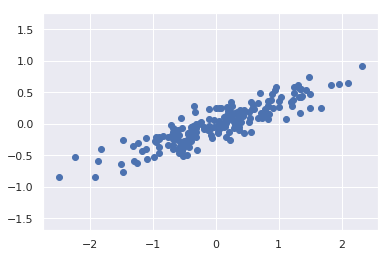

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

#產生實驗數據
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal');



 **淺色的點是原始數據，深色的數據是投影的版本。我們可以看到PCA降維的含義：沿著最不重要的主軸的信息都被去除了，僅留下了含有最高方差值的數據成分。被去除的那一小部分方差值基本可以看成是數據降維後損失的“信息”量。**

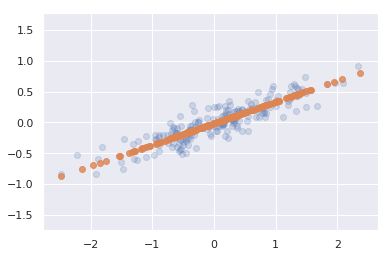

In [3]:
#降维
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(x)
x_pca = pca.transform(x)

#可視化降维的效果
x_new = pca.inverse_transform(x_pca)
plt.scatter(x[:, 0], x[:, 1], alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], alpha=0.8)
plt.axis('equal');

 **我們可以通過累計方差貢獻值和希望保留的原始數據的信息量來確定需要保留的主成份數量。**

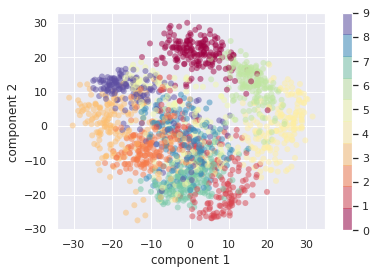

In [4]:
#將手寫數據從8x8=64維空間降维到二维空間，進行可视視化
from sklearn.datasets import load_digits
digits = load_digits()
pca = PCA(2)
projected = pca.fit_transform(digits.data)

#畫出每個點的前兩個主成份
plt.scatter(projected[:, 0], projected[:, 1], c=digits.target, edgecolor='none',
            alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


 **二維的投影會損失很多信息 ，由圖可知我們需要大約20個成分來保持90%的方差。**



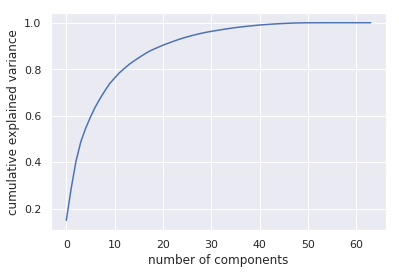

In [5]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**PCA也可以被用作噪音數據的過濾方法，任何成分的方差都遠大於噪音的方差，所以相比於噪音，成分應該相對不受影響。因此，如果你僅用主成份的最大子集重構該數據，那麼應該可以實現選擇性保留信號並且丟棄噪音。**

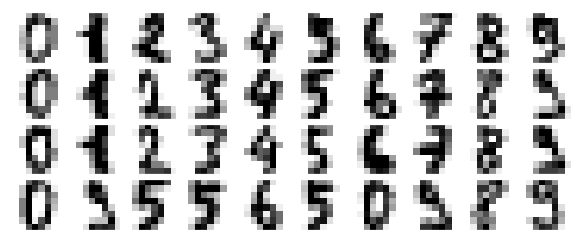

In [6]:
#先畫一個没有噪音的手寫數字的圖像
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4), 
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8), cmap='binary', 
                  interpolation='nearest', clim=(0, 16))
plot_digits(digits.data)

 **隨意添加一些随機噪音並創建一個噪音數據集。**

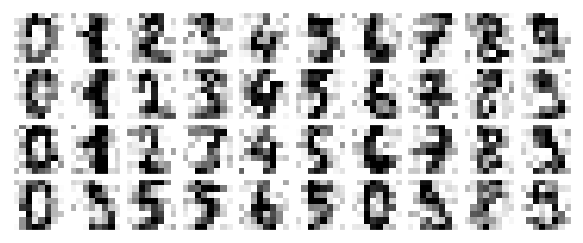

In [7]:

np.random.seed(40)
noisy = np.random.normal(digits.data, 3)
plot_digits(noisy)

**用噪音數據訓練一個只保存50%方差的PCA，再利用逆變換重構過濾後的手寫數字**。

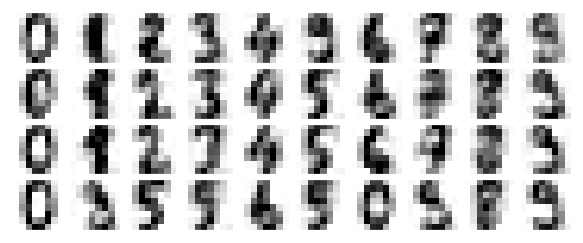

In [8]:
pca = PCA(0.50).fit(noisy)
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)